# GemPy test models
This small presentation notebook will cover some simple models build in [GemPy](https://github.com/cgre-aachen/gempy) to showcase necessary inputs and the behaviour of some of its features.  
1. Minimum required input data  
2. How Series work  
    2.1 Model 2 layers in 1 Series  
    2.2 Model 2 layers in 2 Series  
3. Position of orientation data  
4. Fault relations  
5. Onlap relations  
6. Topography  

In [72]:
import numpy as np
import gempy as gp
%matplotlib inline

import theano  # type: ignore

theano.config.gcc.cxxflags = "-Wno-c++11-narrowing"

# Minimum required input data  
GemPy needs two different input data for creating a model: *interface* and *orientation* data. 
*Interfaces* can easily be understood as the ... well ... interface between two geological units. These can, e.g. be mapped in the Field.  
So can *Orientation* measurements (usually with a compass). They comprise two angles here, the `azimuth` $\sigma$ and `dip` $\varphi$  
![orientation_wiki](https://upload.wikimedia.org/wikipedia/commons/8/80/Streichbild.svg)  

| x  |  y |  z |  azimuth | dip  | polarity  |  Formation |
|--:|--:|--:|--:|--:|--:|---|
| 300  | 250  | 545  | 90  | 10  |  1 | sandstone  |
|  300 |  550 |  680 |  90 | 15  |  1 | limestone  |

## Minimum example  
The bare minimum to define an interface between two geological units is two *interface* points and one *orientation* point.

In [9]:
geo_model = gp.create_model('Simple_model')

In [10]:
gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = '../data/00_1Layer_simple_model_interfaces.csv',
            path_o = '../data/00_1Layer_simple_model_orientation.csv');

Active grids: ['regular']


In [11]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,unit_2,Default series,1,#015482,1
1,basement,Basement,1,#9f0052,2


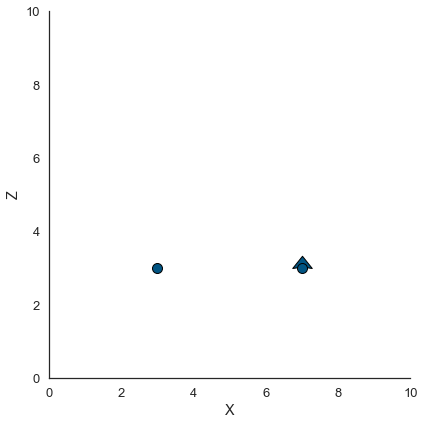

In [12]:
gp._plot.plot_data(geo_model)

In [13]:
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...


INFO (theano.gof.compilelock): Refreshing lock /Users/jan/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.8.12-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /Users/jan/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.8.12-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /Users/jan/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.8.12-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /Users/jan/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.8.12-64/lock_dir/lock


Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range            14.282857
$C_o$             4.857143
drift equations     [3, 3]


In [14]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

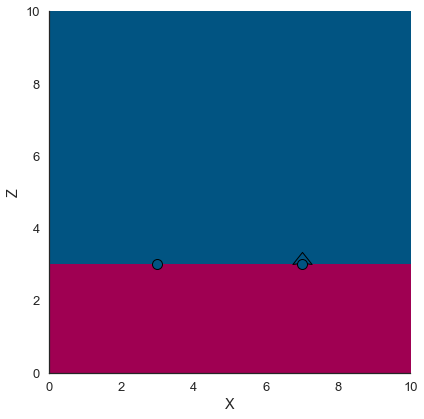

In [16]:
gp._plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

## How Series work  
### A model with 2 layers in 1 Series
Extending the minimum example to a second set of interface points helps to test how `Series` work in GemPy.

In [17]:
geo_model = gp.create_model('2Layer_model')

In [18]:
gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = '../data/01_2Layer_simple_model_interfaces.csv',
            path_o = '../data/01_2Layer_simple_model_orientation.csv');

Active grids: ['regular']


In [19]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,unit_1,Default series,1,#015482,1
1,unit_2,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


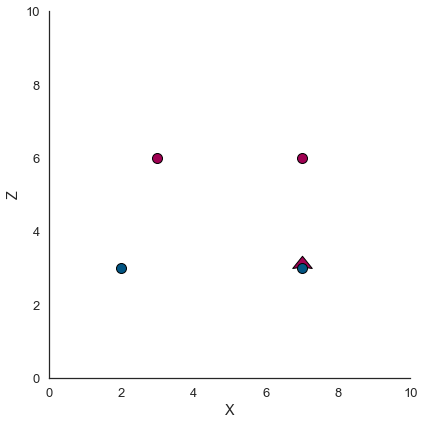

In [20]:
gp._plot.plot_data(geo_model)

In [22]:
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range            14.282857
$C_o$             4.857143
drift equations     [3, 3]


In [23]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

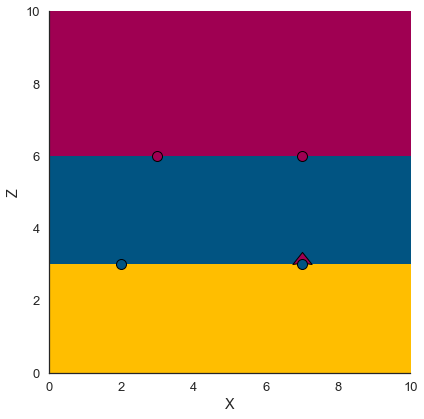

In [25]:
gp._plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

This works only, because both layers are in the **same** Series, `default_series`.   
But what happens, if we define 2 series for the 2 units we have?

### A model with 2 layers in 2 series

In [26]:
gp.map_series_to_surfaces(geo_model,
                         {"Series_1": 'unit_1',
                         "Series_2": 'unit_2'})

,surface,series,order_surfaces,color,id
0,unit_1,Series_1,1,#015482,1
1,unit_2,Series_2,1,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [27]:
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range            14.282857
$C_o$             4.857143
drift equations  [3, 3, 3]


In [28]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)
## This will cause an error, and that is on purpose ##

ValueError: Input dimension mis-match. (input[0].shape[1] = 0, input[1].shape[1] = 1)
Apply node that caused the error: Elemwise{sub,no_inplace}(Subtensor{::, int64:int64:}.0, Subtensor{::, int64:int64:}.0)
Toposort index: 111
Inputs types: [TensorType(float64, matrix), TensorType(float64, matrix)]
Inputs shapes: [(0, 0), (0, 1)]
Inputs strides: [(240016, 8), (240016, 8)]
Inputs values: [array([], shape=(0, 0), dtype=float64), array([], shape=(0, 1), dtype=float64)]
Inputs type_num: [12, 12]
Outputs clients: [[Elemwise{add,no_inplace}(Elemwise{sub,no_inplace}.0, TensorConstant{(1, 1) of 0.0001})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/gempy/core/interpolator.py", line 1124, in compile_th_fn_geo
    self.theano_graph.theano_output(),
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/gempy/core/theano_modules/theano_graph_pro.py", line 631, in theano_output
    solutions[:9] = self.compute_series()
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/gempy/core/theano_modules/theano_graph_pro.py", line 465, in compute_series
    series, self.updates1 = theano.scan(
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/theano/scan_module/scan.py", line 774, in scan
    condition, outputs, updates = scan_utils.get_updates_and_outputs(fn(*args))
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/gempy/core/theano_modules/theano_graph_pro.py", line 2137, in compute_a_series
    self.solve_kriging(b),
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/gempy/core/theano_modules/theano_graph_pro.py", line 1375, in solve_kriging
    C_matrix = self.covariance_matrix()
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/gempy/core/theano_modules/theano_graph_pro.py", line 1260, in covariance_matrix
    F_I, F_G = self.faults_matrix()
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/gempy/core/theano_modules/theano_graph_pro.py", line 1233, in faults_matrix
    self.fault_drift_at_surface_points_ref - self.fault_drift_at_surface_points_rest) + 0.0001

Debugprint of the apply node: 
Elemwise{sub,no_inplace} [id A] <TensorType(float64, matrix)> ''   
 |Subtensor{::, int64:int64:} [id B] <TensorType(float64, matrix)> ''   
 | |Elemwise{mul,no_inplace} [id C] <TensorType(float64, matrix)> ''   
 | | |AdvancedSubtensor [id D] <TensorType(float64, matrix)> ''   
 | | | |<TensorType(float64, 3D)> [id E] <TensorType(float64, 3D)>
 | | | |Subtensor{int64} [id F] <TensorType(int64, vector)> ''   
 | | | | |Nonzero [id G] <TensorType(int64, matrix)> ''   
 | | | | | |Elemwise{Cast{int8}} [id H] <TensorType(int8, vector)> ''   
 | | | | |   |Subtensor{::, int8} [id I] <TensorType(int64, vector)> ''   
 | | | | |     |fault relation matrix_copy [id J] <TensorType(int64, matrix)>
 | | | | |     |ScalarFromTensor [id K] <int8> ''   
 | | | | |       |Elemwise{Cast{int8}} [id L] <TensorType(int8, scalar)> ''   
 | | | | |         |<TensorType(int32, scalar)> [id M] <TensorType(int32, scalar)>
 | | | | |Constant{0} [id N] <int64>
 | | | |TensorConstant{0} [id O] <TensorType(int64, scalar)>
 | | | |MakeSlice [id P] <slice> ''   
 | | |   |TensorConstant{0} [id Q] <TensorType(int8, scalar)>
 | | |   |Elemwise{add,no_inplace} [id R] <TensorType(int64, scalar)> ''   
 | | |   | |Elemwise{add,no_inplace} [id S] <TensorType(int64, scalar)> ''   
 | | |   | | |Subtensor{int64} [id T] <TensorType(int64, scalar)> ''   
 | | |   | | | |Shape [id U] <TensorType(int64, vector)> ''   
 | | |   | | | | |Coordinates of the grid points to interpolate_copy [id V] <TensorType(float64, matrix)>
 | | |   | | | |Constant{0} [id N] <int64>
 | | |   | | |Elemwise{mul,no_inplace} [id W] <TensorType(int64, scalar)> ''   
 | | |   | |   |TensorConstant{2} [id X] <TensorType(int8, scalar)>
 | | |   | |   |Elemwise{sub,no_inplace} [id Y] <TensorType(int64, scalar)> ''   
 | | |   | |     |Subtensor{int64} [id Z] <TensorType(int64, scalar)> ''   
 | | |   | |     | |Shape [id BA] <TensorType(int64, vector)> ''   
 | | |   | |     | | |All the surface_points points at once_copy [id BB] <TensorType(float64, matrix)>
 | | |   | |     | |Constant{0} [id N] <int64>
 | | |   | |     |Subtensor{int64} [id BC] <TensorType(int64, scalar)> ''   
 | | |   | |       |Shape [id BD] <TensorType(int64, vector)> ''   
 | | |   | |       | |Number of points per surface used to split rest-ref_copy [id BE] <TensorType(int32, vector)>
 | | |   | |       |Constant{0} [id N] <int64>
 | | |   | |TensorConstant{0} [id Q] <TensorType(int8, scalar)>
 | | |   |NoneConst [id BF] <NoneTypeT>
 | | |InplaceDimShuffle{x,x} [id BG] <TensorType(float64, (True, True))> ''   
 | |   |<TensorType(float64, scalar)> [id BH] <TensorType(float64, scalar)>
 | |ScalarFromTensor [id BI] <int64> ''   
 | | |Elemwise{add,no_inplace} [id BJ] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{add,no_inplace} [id BK] <TensorType(int64, scalar)> ''   
 | |   | |Subtensor{int64} [id T] <TensorType(int64, scalar)> ''   
 | |   | |Elemwise{sub,no_inplace} [id Y] <TensorType(int64, scalar)> ''   
 | |   |Length of surface_points in every series[t] [id BL] <TensorType(int32, scalar)>
 | |ScalarFromTensor [id BM] <int64> ''   
 |   |Elemwise{add,no_inplace} [id BN] <TensorType(int64, scalar)> ''   
 |     |Elemwise{add,no_inplace} [id BK] <TensorType(int64, scalar)> ''   
 |     |Length of surface_points in every series[t+1] [id BO] <TensorType(int32, scalar)>
 |Subtensor{::, int64:int64:} [id BP] <TensorType(float64, matrix)> ''   
   |Elemwise{mul,no_inplace} [id C] <TensorType(float64, matrix)> ''   
   |ScalarFromTensor [id BQ] <int64> ''   
   | |Elemwise{add,no_inplace} [id BR] <TensorType(int64, scalar)> ''   
   |   |Subtensor{int64} [id T] <TensorType(int64, scalar)> ''   
   |   |Length of surface_points in every series[t] [id BL] <TensorType(int32, scalar)>
   |ScalarFromTensor [id BS] <int64> ''   
     |Elemwise{add,no_inplace} [id BT] <TensorType(int64, scalar)> ''   
       |Subtensor{int64} [id T] <TensorType(int64, scalar)> ''   
       |Length of surface_points in every series[t+1] [id BO] <TensorType(int32, scalar)>

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.
Apply node that caused the error: for{cpu,Looping}(Elemwise{minimum,no_inplace}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, Number of points per surface used to split rest-ref, fault relation matrix, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, Nugget effect of gradients, Nugget effect of scalar, Attenuation factor, Sigmoid Outside, Sigmoid slope, <TensorType(int64, vector)>, <TensorType(bool, vector)>, <TensorType(int64, vector)>, Coordinates of the grid points to interpolate, All the surface_points points at once, Position of the dips, Angle of every dip, Azimuth, Polarity, Values that the blocks are taking)
Toposort index: 167
Inputs types: [TensorType(int64, scalar), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(int32, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int32, vector), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, 4D), TensorType(float64, matrix), TensorType(float64, 3D), TensorType(float64, 3D), TensorType(bool, 3D), TensorType(bool, 3D), TensorType(float64, 4D), TensorType(int64, vector), TensorType(int32, vector), TensorType(int64, matrix), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(int64, vector), TensorType(bool, vector), TensorType(int64, vector), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, matrix)]
Inputs shapes: [(), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (2, 1, 1, 30002), (2, 7), (2, 1, 30002), (2, 1, 1), (2, 1, 30002), (2, 1, 30002), (2, 1, 1, 30002), (2,), (2,), (1, 1), (), (), (), (3,), (4,), (), (), (), (1,), (1,), (1,), (30000, 3), (4, 3), (1, 3), (1,), (1,), (1,), (1, 1)]
Inputs strides: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (1,), (1,), (1,), (4,), (8,), (8,), (4,), (8,), (8,), (240016, 240016, 240016, 8), (56, 8), (240016, 240016, 8), (8, 8, 8), (30002, 30002, 1), (30002, 30002, 1), (240016, 240016, 240016, 8), (8,), (4,), (8, 8), (), (), (), (8,), (8,), (), (), (), (8,), (1,), (8,), (24, 8), (8, 32), (24, 8), (8,), (8,), (8,), (8, 8)]
Inputs values: [array(1), array([0], dtype=int32), array([1], dtype=int32), array([0], dtype=int32), array([1], dtype=int32), array([0], dtype=int32), array([7], dtype=int32), array([0], dtype=int32), array([1], dtype=int32), array([3], dtype=int32), array([ True]), array([ True]), array([ True]), array([0], dtype=int32), array([0]), array([0]), array([0], dtype=int32), array([1.42828569]), array([0.48571429]), 'not shown', 'not shown', 'not shown', array([[[0.0e+000]],

       [[3.5e-323]]]), 'not shown', 'not shown', 'not shown', array([0, 7]), array([1, 1], dtype=int32), array([[0]]), array(10.), array(2.), array(4.), array([0.01, 0.01, 0.01]), array([2.e-06, 2.e-06, 2.e-06, 2.e-06]), array(2.), array(50.), array(50000.), array([0]), array([False]), array([0]), 'not shown', 'not shown', array([[0.7501, 0.5001, 0.3501]]), array([0.]), array([90.]), array([1.]), array([[3.]])]
Inputs type_num: [7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 7, 7, 5, 12, 12, 12, 12, 12, 12, 0, 0, 12, 7, 5, 7, 12, 12, 12, 12, 12, 12, 12, 12, 7, 0, 7, 12, 12, 12, 12, 12, 12, 12]
Outputs clients: [[Subtensor{int64::}(for{cpu,Looping}.0, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.1, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.2, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.3, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.4, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.5, Constant{1})], [], []]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/z6/20w26f6116n_d3cf2pdvb8fh0000gn/T/ipykernel_23880/1466032538.py", line 2, in <module>
    gp.set_interpolator(geo_model,
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/gempy/api_modules/setters.py", line 108, in set_interpolator
    geo_model._interpolator.compile_th_fn_geo(inplace=True, grid=grid)
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/gempy/core/interpolator.py", line 1124, in compile_th_fn_geo
    self.theano_graph.theano_output(),
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/gempy/core/theano_modules/theano_graph_pro.py", line 631, in theano_output
    solutions[:9] = self.compute_series()
  File "/Users/jan/opt/miniconda3/envs/env_gempy_Mac/lib/python3.8/site-packages/gempy/core/theano_modules/theano_graph_pro.py", line 465, in compute_series
    series, self.updates1 = theano.scan(

Debugprint of the apply node: 
for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |Elemwise{minimum,no_inplace} [id C] <TensorType(int64, scalar)> ''   
 | | |Elemwise{minimum,no_inplace} [id D] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id E] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{minimum,no_inplace} [id F] <TensorType(int64, scalar)> ''   
 | | | | | |Elemwise{minimum,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | | | | | |Elemwise{minimum,no_inplace} [id H] <TensorType(int64, scalar)> ''   
 | | | | | | | |Elemwise{minimum,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | | | | | | | | |Elemwise{minimum,no_inplace} [id J] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |Elemwise{minimum,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |Elemwise{minimum,no_inplace} [id L] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id N] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id O] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id P] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id Q] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id R] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | | |Subtensor{int64} [id S] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | | | |Shape [id T] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | | | | | | |Subtensor{int64:int64:} [id U] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | | | | | | | | | | | | | | | | | | |Constant{0} [id V] <int64>
 | | | | | | | | | | | | | | | | | |Subtensor{int64} [id W] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | |   |Shape [id X] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | | | |   | |Subtensor{int64::} [id Y] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | | | | | | | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | | | | | | | |Subtensor{int64} [id Z] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | |   |Shape [id BA] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id BB] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | | | | | | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | | | | | | |Subtensor{int64} [id BC] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |   |Shape [id BD] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | |   | |Subtensor{int64::} [id BE] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | | | | | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | | | | | |Subtensor{int64} [id BF] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |   |Shape [id BG] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id BH] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | | | | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | | | | |Subtensor{int64} [id BI] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |   |Shape [id BJ] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | |   | |Subtensor{int64::} [id BK] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | | | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | | | |Subtensor{int64} [id BL] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |   |Shape [id BM] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id BN] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | | |Subtensor{int64} [id BO] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |   |Shape [id BP] <TensorType(int64, vector)> ''   
 | | | | | | | | | | |   | |Subtensor{int64::} [id BQ] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | |Subtensor{int64} [id BR] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |   |Shape [id BS] <TensorType(int64, vector)> ''   
 | | | | | | | | | |   | |Subtensor{int64::} [id BT] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | |Subtensor{int64} [id BU] <TensorType(int64, scalar)> ''   
 | | | | | | | | |   |Shape [id BV] <TensorType(int64, vector)> ''   
 | | | | | | | | |   | |Subtensor{int64::} [id BW] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | |Subtensor{int64} [id BX] <TensorType(int64, scalar)> ''   
 | | | | | | | |   |Shape [id BY] <TensorType(int64, vector)> ''   
 | | | | | | | |   | |Subtensor{int64::} [id BZ] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | |Subtensor{int64} [id CA] <TensorType(int64, scalar)> ''   
 | | | | | | |   |Shape [id CB] <TensorType(int64, vector)> ''   
 | | | | | | |   | |Subtensor{int64::} [id CC] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | |Subtensor{int64} [id CD] <TensorType(int64, scalar)> ''   
 | | | | | |   |Shape [id CE] <TensorType(int64, vector)> ''   
 | | | | | |   | |Subtensor{int64::} [id CF] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | | | | | |   |Constant{0} [id V] <int64>
 | | | | | |Subtensor{int64} [id CG] <TensorType(int64, scalar)> ''   
 | | | | |   |Shape [id CH] <TensorType(int64, vector)> ''   
 | | | | |   | |Subtensor{int64::} [id CI] <TensorType(int64, vector)> ''   
 | | | | |   |   |<TensorType(int64, vector)> [id CJ] <TensorType(int64, vector)>
 | | | | |   |   |Constant{0} [id V] <int64>
 | | | | |   |Constant{0} [id V] <int64>
 | | | | |Subtensor{int64} [id CK] <TensorType(int64, scalar)> ''   
 | | | |   |Shape [id CL] <TensorType(int64, vector)> ''   
 | | | |   | |Subtensor{int64::} [id CM] <TensorType(int64, vector)> ''   
 | | | |   |   |<TensorType(int64, vector)> [id CN] <TensorType(int64, vector)>
 | | | |   |   |Constant{0} [id V] <int64>
 | | | |   |Constant{0} [id V] <int64>
 | | | |TensorConstant{5000} [id CO] <TensorType(int64, scalar)>
 | | |Subtensor{int64} [id CP] <TensorType(int64, scalar)> ''   
 | |   |Shape [id CQ] <TensorType(int64, vector)> ''   
 | |   | |Subtensor{int64::} [id CR] <TensorType(float64, vector)> 'Range[0:]'   
 | |   |Constant{0} [id V] <int64>
 | |Subtensor{int64} [id CS] <TensorType(int64, scalar)> ''   
 |   |Shape [id CT] <TensorType(int64, vector)> ''   
 |   | |Subtensor{int64::} [id CU] <TensorType(float64, vector)> 'Covariance at 0[0:]'   
 |   |Constant{0} [id V] <int64>
 |Subtensor{:int64:} [id CV] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id U] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id CX] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id Y] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id CY] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BB] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id CZ] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BE] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DA] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BH] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DB] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BK] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DC] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BN] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DD] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BQ] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DE] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BT] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DF] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BW] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DG] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BZ] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DH] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id CC] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DI] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CF] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DJ] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id CI] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DK] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id CM] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DL] <TensorType(int32, vector)> ''   
 | |TensorConstant{[   0    1..4998 4999]} [id DM] <TensorType(int32, vector)>
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DN] <TensorType(float64, vector)> ''   
 | |Subtensor{int64::} [id CR] <TensorType(float64, vector)> 'Range[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DO] <TensorType(float64, vector)> ''   
 | |Subtensor{int64::} [id CU] <TensorType(float64, vector)> 'Covariance at 0[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |IncSubtensor{Set;:int64:} [id DP] <TensorType(float64, 4D)> ''   
 | |AllocEmpty{dtype='float64'} [id DQ] <TensorType(float64, 4D)> ''   
 | | |Elemwise{add,no_inplace} [id DR] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DS] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DT] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DU] <TensorType(float64, 4D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1,2} [id DV] <TensorType(float64, (True, False, False, False))> ''   
 | | |   |     |block matrix [id DW] <TensorType(float64, 3D)>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id DX] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DT] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DY] <int64>
 | | |Subtensor{int64} [id DZ] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DT] <TensorType(int64, vector)> ''   
 | | | |Constant{2} [id EA] <int64>
 | | |Subtensor{int64} [id EB] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DT] <TensorType(int64, vector)> ''   
 | |   |Constant{3} [id EC] <int64>
 | |Rebroadcast{0} [id DU] <TensorType(float64, 4D)> ''   
 | |ScalarFromTensor [id ED] <int64> ''   
 |   |Subtensor{int64} [id DS] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EE] <TensorType(float64, matrix)> ''   
 | |AllocEmpty{dtype='float64'} [id EF] <TensorType(float64, matrix)> ''   
 | | |Elemwise{add,no_inplace} [id EG] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EJ] <TensorType(float64, matrix)> ''   
 | | |   |   |InplaceDimShuffle{x,0} [id EK] <TensorType(float64, row)> ''   
 | | |   |     |Weights vector [id EL] <TensorType(float64, vector)>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id EM] <TensorType(int64, scalar)> ''   
 | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | |   |Constant{1} [id DY] <int64>
 | |Rebroadcast{0} [id EJ] <TensorType(float64, matrix)> ''   
 | |ScalarFromTensor [id EN] <int64> ''   
 |   |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EO] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id EP] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id EQ] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id ER] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id ES] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id ET] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EU] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Scalar matrix [id EV] <TensorType(float64, matrix)>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id EW] <TensorType(int64, scalar)> ''   
 | | | |Shape [id ES] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DY] <int64>
 | | |Subtensor{int64} [id EX] <TensorType(int64, scalar)> ''   
 | |   |Shape [id ES] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id EA] <int64>
 | |Rebroadcast{0} [id ET] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id EY] <int64> ''   
 |   |Subtensor{int64} [id ER] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EZ] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id FA] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id FB] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id FC] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id FD] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id FE] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id FF] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Alloc [id FG] <TensorType(float64, matrix)> ''   
 | | |   |       |TensorConstant{0.0} [id FH] <TensorType(float64, scalar)>
 | | |   |       |Subtensor{int64} [id FI] <TensorType(int64, scalar)> ''   
 | | |   |       | |Shape [id FJ] <TensorType(int64, vector)> ''   
 | | |   |       | | |<TensorType(int64, vector)> [id CJ] <TensorType(int64, vector)>
 | | |   |       | |Constant{0} [id V] <int64>
 | | |   |       |Subtensor{int64} [id FK] <TensorType(int32, scalar)> ''   
 | | |   |         |List with the number of surfaces [id FL] <TensorType(int32, vector)>
 | | |   |         |Constant{-1} [id FM] <int64>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id FN] <TensorType(int64, scalar)> ''   
 | | | |Shape [id FD] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DY] <int64>
 | | |Subtensor{int64} [id FO] <TensorType(int64, scalar)> ''   
 | |   |Shape [id FD] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id EA] <int64>
 | |Rebroadcast{0} [id FE] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id FP] <int64> ''   
 |   |Subtensor{int64} [id FC] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id FQ] <TensorType(bool, 3D)> ''   
 | |AllocEmpty{dtype='bool'} [id FR] <TensorType(bool, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id FS] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id FT] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id FU] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id FV] <TensorType(bool, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id FW] <TensorType(bool, (True, False, False))> ''   
 | | |   |     |mask matrix [id FX] <TensorType(bool, matrix)>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id FY] <TensorType(int64, scalar)> ''   
 | | | |Shape [id FU] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DY] <int64>
 | | |Subtensor{int64} [id FZ] <TensorType(int64, scalar)> ''   
 | |   |Shape [id FU] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id EA] <int64>
 | |Rebroadcast{0} [id FV] <TensorType(bool, 3D)> ''   
 | |ScalarFromTensor [id GA] <int64> ''   
 |   |Subtensor{int64} [id FT] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id GB] <TensorType(bool, 3D)> ''   
 | |AllocEmpty{dtype='bool'} [id GC] <TensorType(bool, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id GD] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id GE] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id GF] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id GG] <TensorType(bool, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id GH] <TensorType(bool, (True, False, False))> ''   
 | | |   |     |Elemwise{second,no_inplace} [id GI] <TensorType(bool, matrix)> ''   
 | | |   |       |mask matrix [id FX] <TensorType(bool, matrix)>
 | | |   |       |TensorConstant{(1, 1) of False} [id GJ] <TensorType(bool, (True, True))>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id GK] <TensorType(int64, scalar)> ''   
 | | | |Shape [id GF] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DY] <int64>
 | | |Subtensor{int64} [id GL] <TensorType(int64, scalar)> ''   
 | |   |Shape [id GF] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id EA] <int64>
 | |Rebroadcast{0} [id GG] <TensorType(bool, 3D)> ''   
 | |ScalarFromTensor [id GM] <int64> ''   
 |   |Subtensor{int64} [id GE] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id GN] <TensorType(float64, 4D)> ''   
 | |AllocEmpty{dtype='float64'} [id GO] <TensorType(float64, 4D)> ''   
 | | |Elemwise{add,no_inplace} [id GP] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id GQ] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id GR] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id GS] <TensorType(float64, 4D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1,2} [id GT] <TensorType(float64, (True, False, False, False))> ''   
 | | |   |     |Elemwise{second,no_inplace} [id GU] <TensorType(float64, 3D)> ''   
 | | |   |       |block matrix [id DW] <TensorType(float64, 3D)>
 | | |   |       |TensorConstant{(1, 1, 1) of 0.0} [id GV] <TensorType(float64, (True, True, True))>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id GW] <TensorType(int64, scalar)> ''   
 | | | |Shape [id GR] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DY] <int64>
 | | |Subtensor{int64} [id GX] <TensorType(int64, scalar)> ''   
 | | | |Shape [id GR] <TensorType(int64, vector)> ''   
 | | | |Constant{2} [id EA] <int64>
 | | |Subtensor{int64} [id GY] <TensorType(int64, scalar)> ''   
 | |   |Shape [id GR] <TensorType(int64, vector)> ''   
 | |   |Constant{3} [id EC] <int64>
 | |Rebroadcast{0} [id GS] <TensorType(float64, 4D)> ''   
 | |ScalarFromTensor [id GZ] <int64> ''   
 |   |Subtensor{int64} [id GQ] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id HA] <TensorType(int64, vector)> ''   
 | |AllocEmpty{dtype='int64'} [id HB] <TensorType(int64, vector)> ''   
 | | |Elemwise{add,no_inplace} [id HC] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |   |TensorConstant{1} [id HD] <TensorType(int64, scalar)>
 | |TensorConstant{(1,) of 0} [id HE] <TensorType(int64, vector)>
 | |Constant{1} [id DY] <int64>
 |Number of points per surface used to split rest-ref [id HF] <TensorType(int32, vector)>
 |fault relation matrix [id HG] <TensorType(int64, matrix)>
 |<TensorType(float64, scalar)> [id HH] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id HI] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id HJ] <TensorType(float64, scalar)>
 |Nugget effect of gradients [id HK] <TensorType(float64, vector)>
 |Nugget effect of scalar [id HL] <TensorType(float64, vector)>
 |Attenuation factor [id HM] <TensorType(float64, scalar)>
 |Sigmoid Outside [id HN] <TensorType(float64, scalar)>
 |Sigmoid slope [id HO] <TensorType(float64, scalar)>
 |<TensorType(int64, vector)> [id CN] <TensorType(int64, vector)>
 |<TensorType(bool, vector)> [id HP] <TensorType(bool, vector)>
 |<TensorType(int64, vector)> [id CJ] <TensorType(int64, vector)>
 |Coordinates of the grid points to interpolate [id HQ] <TensorType(float64, matrix)>
 |All the surface_points points at once [id HR] <TensorType(float64, matrix)>
 |Position of the dips [id HS] <TensorType(float64, matrix)>
 |Angle of every dip [id HT] <TensorType(float64, vector)>
 |Azimuth [id HU] <TensorType(float64, vector)>
 |Polarity [id HV] <TensorType(float64, vector)>
 |Values that the blocks are taking [id HW] <TensorType(float64, matrix)>
for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   
for{cpu,Looping}.5 [id A] <TensorType(bool, 3D)> ''   
for{cpu,Looping}.6 [id A] <TensorType(float64, 4D)> ''   
for{cpu,Looping}.7 [id A] <TensorType(int64, vector)> ''   

Inner graphs of the scan ops:

for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 > |block matrix[t-1] [id HY] <TensorType(float64, 3D)> -> [id DP]
 > |if{} [id HZ] <TensorType(float64, matrix)> ''   
 > | |Vector controlling if block matrix must be recomputed[t] [id IA] <TensorType(bool, scalar)> -> [id DH]
 > | |if{} [id IB] <TensorType(float64, matrix)> ''   
 > | | |The series (fault) is finite[t] [id IC] <TensorType(int32, scalar)> -> [id DI]
 > | | |Sum{axis=[0], acc_dtype=float64} [id ID] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | | |Sum{axis=[0], acc_dtype=float64} [id IE] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | |Subtensor{int32, ::} [id IF] <TensorType(float64, matrix)> ''   
 > |   |block matrix[t-1] [id HY] <TensorType(float64, 3D)> -> [id DP]
 > |   |ScalarFromTensor [id IG] <int32> ''   
 > |     |<TensorType(int32, scalar)> [id IH] <TensorType(int32, scalar)> -> [id DL]
 > |ScalarFromTensor [id IG] <int32> ''   
 > |Constant{0} [id II] <int8>
 > |ScalarFromTensor [id IJ] <int64> ''   
 >   |Elemwise{add,no_inplace} [id IK] <TensorType(int64, scalar)> ''   
 >     |Elemwise{add,no_inplace} [id IL] <TensorType(int64, scalar)> ''   
 >     | |Subtensor{int64} [id IM] <TensorType(int64, scalar)> ''   
 >     | | |Shape [id IN] <TensorType(int64, vector)> ''   
 >     | | | |Coordinates of the grid points to interpolate_copy [id IO] <TensorType(float64, matrix)> -> [id HQ]
 >     | | |Constant{0} [id IP] <int64>
 >     | |Elemwise{mul,no_inplace} [id IQ] <TensorType(int64, scalar)> ''   
 >     |   |TensorConstant{2} [id IR] <TensorType(int8, scalar)>
 >     |   |Elemwise{sub,no_inplace} [id IS] <TensorType(int64, scalar)> ''   
 >     |     |Subtensor{int64} [id IT] <TensorType(int64, scalar)> ''   
 >     |     | |Shape [id IU] <TensorType(int64, vector)> ''   
 >     |     | | |All the surface_points points at once_copy [id IV] <TensorType(float64, matrix)> -> [id HR]
 >     |     | |Constant{0} [id IP] <int64>
 >     |     |Subtensor{int64} [id IW] <TensorType(int64, scalar)> ''   
 >     |       |Shape [id IX] <TensorType(int64, vector)> ''   
 >     |       | |Number of points per surface used to split rest-ref_copy [id IY] <TensorType(int32, vector)> -> [id HF]
 >     |       |Constant{0} [id IP] <int64>
 >     |TensorConstant{0} [id IZ] <TensorType(int8, scalar)>
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 > |Weights vector[t-1] [id JB] <TensorType(float64, vector)> -> [id EE]
 > |if{} [id JC] <TensorType(float64, vector)> ''   
 > | |Vector controlling if weights must be recomputed[t] [id JD] <TensorType(bool, scalar)> -> [id DF]
 > | |Reshape{1} [id JE] <TensorType(float64, vector)> 'Dual Kriging parameters'   
 > | |Subtensor{int32:int32:} [id JF] <TensorType(float64, vector)> ''   
 > |   |Weights vector[t-1] [id JB] <TensorType(float64, vector)> -> [id EE]
 > |   |ScalarFromTensor [id JG] <int32> ''   
 > |   | |Length of weights in every series[t] [id JH] <TensorType(int32, scalar)> -> [id DA]
 > |   |ScalarFromTensor [id JI] <int32> ''   
 > |     |Length of weights in every series[t+1] [id JJ] <TensorType(int32, scalar)> -> [id DB]
 > |ScalarFromTensor [id JG] <int32> ''   
 > |ScalarFromTensor [id JI] <int32> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 > |Scalar matrix[t-1] [id JL] <TensorType(float64, matrix)> -> [id EO]
 > |if{} [id JM] <TensorType(float64, vector)> ''   
 > | |Vector controlling if scalar matrix must be recomputed[t] [id JN] <TensorType(bool, scalar)> -> [id DG]
 > | |Subtensor{int64} [id JO] <TensorType(float64, vector)> 'Value of the potential field at every point'   
 > | |Subtensor{int32} [id JP] <TensorType(float64, vector)> ''   
 > |   |Scalar matrix[t-1] [id JL] <TensorType(float64, matrix)> -> [id EO]
 > |   |ScalarFromTensor [id IG] <int32> ''   
 > |ScalarFromTensor [id IG] <int32> ''   
 > |Constant{0} [id II] <int8>
 > |ScalarFromTensor [id IJ] <int64> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 > |<TensorType(float64, matrix)> [id JR] <TensorType(float64, matrix)> -> [id EZ]
 > |AdvancedSubtensor1 [id JS] <TensorType(float64, vector)> ''   
 > | |Subtensor{int64:int64:} [id JT] <TensorType(float64, vector)> ''   
 > | | |if{} [id JM] <TensorType(float64, vector)> ''   
 > | | |ScalarFromTensor [id JU] <int64> ''   
 > | | | |Elemwise{mul,no_inplace} [id JV] <TensorType(int64, scalar)> ''   
 > | | |   |TensorConstant{-2} [id JW] <TensorType(int8, scalar)>
 > | | |   |Elemwise{sub,no_inplace} [id IS] <TensorType(int64, scalar)> ''   
 > | | |ScalarFromTensor [id JX] <int64> ''   
 > | |   |Elemwise{neg,no_inplace} [id JY] <TensorType(int64, scalar)> ''   
 > | |     |Elemwise{sub,no_inplace} [id IS] <TensorType(int64, scalar)> ''   
 > | |Subtensor{int32:int32:} [id JZ] <TensorType(int32, vector)> ''   
 > |   |CumOp{None, add} [id KA] <TensorType(int32, vector)> 'Number of points per surfaces after rest-ref. This is used for finding the differentsurface points withing a layer.'   
 > |   |ScalarFromTensor [id KB] <int32> ''   
 > |   | |List with the number of surfaces[t] [id KC] <TensorType(int32, scalar)> -> [id DC]
 > |   |ScalarFromTensor [id KD] <int32> ''   
 > |     |List with the number of surfaces[t+1] [id KE] <TensorType(int32, scalar)> -> [id DD]
 > |<TensorType(int32, scalar)> [id IH] <TensorType(int32, scalar)> -> [id DL]
 > |Elemwise{sub,no_inplace} [id KF] <TensorType(int32, vector)> ''   
 >   |Subtensor{int32:int32:} [id KG] <TensorType(int32, vector)> ''   
 >   | |TensorConstant{[   1    2..4998 4999]} [id KH] <TensorType(int32, vector)>
 >   | |ScalarFromTensor [id KB] <int32> ''   
 >   | |ScalarFromTensor [id KD] <int32> ''   
 >   |TensorConstant{(1,) of 1} [id KI] <TensorType(int8, (True,))>
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 > |IncSubtensor{Set;int64:int32:, int8:int64:} [id KK] <TensorType(bool, matrix)> ''   
 > | |IncSubtensor{Set;int32:int32:, int8:int64:} [id KL] <TensorType(bool, matrix)> ''   
 > | | |mask matrix[t-1] [id KM] <TensorType(bool, matrix)> -> [id FQ]
 > | | |if{} [id KN] <TensorType(bool, vector)> ''   
 > | | | |<TensorType(int64, scalar)> [id KO] <TensorType(int64, scalar)> -> [id DK]
 > | | | |Elemwise{gt,no_inplace} [id KP] <TensorType(bool, vector)> ''   
 > | | | | |if{} [id JM] <TensorType(float64, vector)> ''   
 > | | | | |InplaceDimShuffle{x} [id KQ] <TensorType(float64, (True,))> ''   
 > | | | |   |MaxAndArgmax{axis=(0,)}.0 [id KR] <TensorType(float64, scalar)> 'max'   
 > | | | |Subtensor{int32, int8:int64:} [id KS] <TensorType(bool, vector)> ''   
 > | | |   |mask matrix[t-1] [id KM] <TensorType(bool, matrix)> -> [id FQ]
 > | | |   |ScalarFromTensor [id KT] <int32> ''   
 > | | |   | |Elemwise{sub,no_inplace} [id KU] <TensorType(int32, scalar)> ''   
 > | | |   |   |<TensorType(int32, scalar)> [id IH] <TensorType(int32, scalar)> -> [id DL]
 > | | |   |   |TensorConstant{1} [id KV] <TensorType(int8, scalar)>
 > | | |   |Constant{0} [id II] <int8>
 > | | |   |ScalarFromTensor [id IJ] <int64> ''   
 > | | |ScalarFromTensor [id KT] <int32> ''   
 > | | |ScalarFromTensor [id IG] <int32> ''   
 > | | |Constant{0} [id II] <int8>
 > | | |ScalarFromTensor [id IJ] <int64> ''   
 > | |Subtensor{::int64} [id KW] <TensorType(bool, matrix)> ''   
 > | | |CumOp{0, mul} [id KX] <TensorType(bool, matrix)> ''   
 > | | | |Subtensor{::int64} [id KY] <TensorType(bool, matrix)> ''   
 > | | |   |Subtensor{int64:int32:, int8:int64:} [id KZ] <TensorType(bool, matrix)> ''   
 > | | |   | |IncSubtensor{Set;int32:int32:, int8:int64:} [id KL] <TensorType(bool, matrix)> ''   
 > | | |   | |ScalarFromTensor [id LA] <int64> ''   
 > | | |   | | |Elemwise{sub,no_inplace} [id LB] <TensorType(int64, scalar)> ''   
 > | | |   | |   |<TensorType(int32, scalar)> [id IH] <TensorType(int32, scalar)> -> [id DL]
 > | | |   | |   |Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   
 > | | |   | |     |Elemwise{mul,no_inplace} [id LD] <TensorType(int64, scalar)> ''   
 > | | |   | |     | |Elemwise{add,no_inplace} [id LE] <TensorType(int64, scalar)> ''   
 > | | |   | |     | | |<TensorType(int64, scalar)> [id LF] <TensorType(int64, scalar)> -> [id HA]
 > | | |   | |     | | |Elemwise{add,no_inplace} [id LG] <TensorType(int64, scalar)> ''   
 > | | |   | |     | |   |Subtensor{int32} [id LH] <TensorType(int64, scalar)> ''   
 > | | |   | |     | |   | |<TensorType(int64, vector)> [id LI] <TensorType(int64, vector)> -> [id CN]
 > | | |   | |     | |   | |ScalarFromTensor [id IG] <int32> ''   
 > | | |   | |     | |   |Subtensor{int32} [id LJ] <TensorType(bool, scalar)> ''   
 > | | |   | |     | |     |<TensorType(bool, vector)> [id LK] <TensorType(bool, vector)> -> [id HP]
 > | | |   | |     | |     |ScalarFromTensor [id IG] <int32> ''   
 > | | |   | |     | |Elemwise{add,no_inplace} [id LG] <TensorType(int64, scalar)> ''   
 > | | |   | |     |Subtensor{int64} [id LL] <TensorType(int64, scalar)> ''   
 > | | |   | |       |<TensorType(int64, vector)> [id LI] <TensorType(int64, vector)> -> [id CN]
 > | | |   | |       |ScalarFromTensor [id LM] <int64> ''   
 > | | |   | |         |Elemwise{sub,no_inplace} [id LN] <TensorType(int64, scalar)> ''   
 > | | |   | |           |<TensorType(int32, scalar)> [id IH] <TensorType(int32, scalar)> -> [id DL]
 > | | |   | |           |<TensorType(int64, scalar)> [id LF] <TensorType(int64, scalar)> -> [id HA]
 > | | |   | |ScalarFromTensor [id IG] <int32> ''   
 > | | |   | |Constant{0} [id II] <int8>
 > | | |   | |ScalarFromTensor [id IJ] <int64> ''   
 > | | |   |Constant{-1} [id LO] <int64>
 > | | |Constant{-1} [id LO] <int64>
 > | |ScalarFromTensor [id LA] <int64> ''   
 > | |ScalarFromTensor [id IG] <int32> ''   
 > | |Constant{0} [id II] <int8>
 > | |ScalarFromTensor [id IJ] <int64> ''   
 > |if{} [id LP] <TensorType(bool, vector)> ''   
 > | |<TensorType(int64, scalar)> [id LQ] <TensorType(int64, scalar)> -> [id DJ]
 > | |Elemwise{gt,no_inplace} [id LR] <TensorType(bool, vector)> ''   
 > | | |if{} [id JM] <TensorType(float64, vector)> ''   
 > | | |InplaceDimShuffle{x} [id LS] <TensorType(float64, (True,))> ''   
 > | |   |Elemwise{neg,no_inplace} [id LT] <TensorType(float64, scalar)> ''   
 > | |     |MaxAndArgmax{axis=(0,)}.0 [id LU] <TensorType(float64, scalar)> 'max'   
 > | |Elemwise{mul,no_inplace} [id LV] <TensorType(bool, vector)> ''   
 > |   |InplaceDimShuffle{x} [id LW] <TensorType(bool, (True,))> ''   
 > |   | |Elemwise{invert,no_inplace} [id LX] <TensorType(bool, scalar)> ''   
 > |   |   |Subtensor{int32} [id LJ] <TensorType(bool, scalar)> ''   
 > |   |Elemwise{second,no_inplace} [id LY] <TensorType(bool, vector)> ''   
 > |     |if{} [id JM] <TensorType(float64, vector)> ''   
 > |     |TensorConstant{(1,) of True} [id LZ] <TensorType(bool, (True,))>
 > |ScalarFromTensor [id IG] <int32> ''   
 > |Constant{0} [id II] <int8>
 > |ScalarFromTensor [id IJ] <int64> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 > |<TensorType(bool, matrix)> [id MB] <TensorType(bool, matrix)> -> [id GB]
 > |Elemwise{add,no_inplace} [id MC] <TensorType(bool, vector)> ''   
 > | |if{} [id LP] <TensorType(bool, vector)> ''   
 > | |if{} [id MD] <TensorType(bool, vector)> ''   
 > |   |Subtensor{int32} [id LJ] <TensorType(bool, scalar)> ''   
 > |   |Elemwise{gt,no_inplace} [id LR] <TensorType(bool, vector)> ''   
 > |   |Elemwise{second,no_inplace} [id ME] <TensorType(bool, vector)> ''   
 > |     |if{} [id JM] <TensorType(float64, vector)> ''   
 > |     |TensorConstant{(1,) of False} [id MF] <TensorType(bool, (True,))>
 > |Elemwise{mul,no_inplace} [id MG] <TensorType(bool, vector)> ''   
 > | |Subtensor{:int64:} [id MH] <TensorType(bool, vector)> ''   
 > | | |<TensorType(bool, vector)> [id LK] <TensorType(bool, vector)> -> [id HP]
 > | | |ScalarFromTensor [id MI] <int64> ''   
 > | |   |Subtensor{int64} [id MJ] <TensorType(int64, scalar)> ''   
 > | |     |Shape [id MK] <TensorType(int64, vector)> ''   
 > | |     | |<TensorType(int64, vector)> [id ML] <TensorType(int64, vector)> -> [id CJ]
 > | |     |Constant{0} [id IP] <int64>
 > | |Elemwise{invert,no_inplace} [id MM] <TensorType(bool, vector)> ''   
 > |   |Elemwise{Cast{bool}} [id MN] <TensorType(bool, vector)> ''   
 > |     |Subtensor{:int64:} [id MO] <TensorType(int64, vector)> ''   
 > |       |Subtensor{::, int8} [id MP] <TensorType(int64, vector)> ''   
 > |       | |fault relation matrix_copy [id MQ] <TensorType(int64, matrix)> -> [id HG]
 > |       | |ScalarFromTensor [id MR] <int8> ''   
 > |       |   |Elemwise{Cast{int8}} [id MS] <TensorType(int8, scalar)> ''   
 > |       |     |<TensorType(int32, scalar)> [id IH] <TensorType(int32, scalar)> -> [id DL]
 > |       |ScalarFromTensor [id MI] <int64> ''   
 > |MakeSlice [id MT] <slice> ''   
 >   |TensorConstant{0} [id IZ] <TensorType(int8, scalar)>
 >   |Elemwise{add,no_inplace} [id IK] <TensorType(int64, scalar)> ''   
 >   |NoneConst [id MU] <NoneTypeT>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 > |<TensorType(float64, 3D)> [id MW] <TensorType(float64, 3D)> -> [id GN]
 > |if{} [id HZ] <TensorType(float64, matrix)> ''   
 > |ScalarFromTensor [id IG] <int32> ''   
 > |Constant{0} [id II] <int8>
 > |ScalarFromTensor [id IJ] <int64> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.5 [id A] <TensorType(bool, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.6 [id A] <TensorType(float64, 4D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.7 [id A] <TensorType(int64, vector)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

Storage map footprint:
 - Coordinates of the grid points to interpolate, Input, Shape: (30000, 3), ElemSize: 8 Byte(s), TotalSize: 720000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 480032 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 480032 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 480032 Byte(s)
 - for{cpu,Looping}.0, Shape: (2, 1, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 480032 Byte(s)
 - for{cpu,Looping}.2, Shape: (2, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 480032 Byte(s)
 - for{cpu,Looping}.6, Shape: (2, 1, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 480032 Byte(s)
 - block matrix, Shared Input, Shape: (1, 1, 30002), ElemSize: 8 Byte(s), TotalSize: 240016 Byte(s)
 - Scalar matrix, Shared Input, Shape: (1, 30002), ElemSize: 8 Byte(s), TotalSize: 240016 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 30002), ElemSize: 1 Byte(s), TotalSize: 60004 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 30002), ElemSize: 1 Byte(s), TotalSize: 60004 Byte(s)
 - for{cpu,Looping}.4, Shape: (2, 1, 30002), ElemSize: 1 Byte(s), TotalSize: 60004 Byte(s)
 - for{cpu,Looping}.5, Shape: (2, 1, 30002), ElemSize: 1 Byte(s), TotalSize: 60004 Byte(s)
 - mask matrix, Shared Input, Shape: (1, 30002), ElemSize: 1 Byte(s), TotalSize: 30002 Byte(s)
 - TensorConstant{[   0    1..4998 4999]}, Shape: (5000,), ElemSize: 4 Byte(s), TotalSize: 20000 Byte(s)
 - Vector controlling if weights must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if scalar matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if block matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 7), ElemSize: 8 Byte(s), TotalSize: 112 Byte(s)
 - for{cpu,Looping}.1, Shape: (2, 7), ElemSize: 8 Byte(s), TotalSize: 112 Byte(s)
 - All the surface_points points at once, Input, Shape: (4, 3), ElemSize: 8 Byte(s), TotalSize: 96 Byte(s)
 - Weights vector, Shared Input, Shape: (7,), ElemSize: 8 Byte(s), TotalSize: 56 Byte(s)
 - Nugget effect of scalar, Shared Input, Shape: (4,), ElemSize: 8 Byte(s), TotalSize: 32 Byte(s)
 - Position of the dips, Input, Shape: (1, 3), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Range, Shared Input, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Covariance at 0, Shared Input, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Nugget effect of gradients, Shared Input, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 1), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - for{cpu,Looping}.3, Shape: (2, 1, 1), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - for{cpu,Looping}.7, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - The series (fault) is finite, Shared Input, Shape: (3,), ElemSize: 4 Byte(s), TotalSize: 12 Byte(s)
 - Angle of every dip, Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Azimuth, Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Polarity, Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Values that the blocks are taking, Input, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Length of surface_points in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Length of foliations in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Length of weights in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - List with the number of surfaces, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(int64, vector)>, Shared Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(int64, vector)>, Shared Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Number of points per surface used to split rest-ref, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - fault relation matrix, Shared Input, Shape: (1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Attenuation factor, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Sigmoid Outside, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Sigmoid slope, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{5000}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1,) of 0}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{(1, 1, 1) of 0.0}, Shape: (1, 1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Constant{3}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{(1,) of -1}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Grade of the universal drift, Shared Input, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - <TensorType(bool, vector)>, Shared Input, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{(1, 1) of False}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Full block matrix for faults or drift. We take 2 times len points for the faultdrift., Input, Shape: (0, 30002), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 TotalSize: 4374152.0 Byte(s) 0.004 GB
 TotalSize inputs: 1253573.0 Byte(s) 0.001 GB



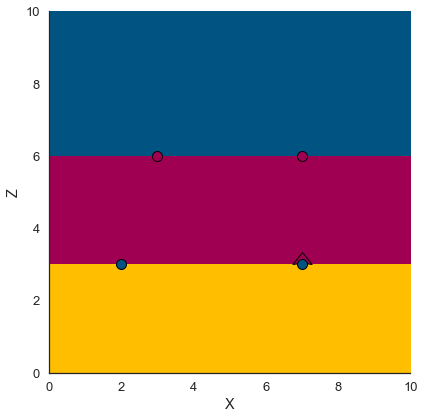

In [30]:
gp._plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

This shows that one *orientation* is still enough for modeling 2 layers, **if** these are arranged in the same [Series](https://gempy.readthedocs.io/Data/data.Series.html#data.Series). Generally however, each unit should have **at least** two *interface* points and one *orientation* point.

### A model with 2 layers in 2 Series  
#### ... and enough input data

In [31]:
geo_model = gp.create_model('2layers_2series')

gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = '../data/02_2Layer_simple_model_interfaces.csv',
            path_o = '../data/02_2Layer_simple_model_2orientation.csv');

Active grids: ['regular']


In [32]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,unit_1,Default series,1,#015482,1
1,unit_2,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


Note that both units belong to the same Series here (`Default series`).

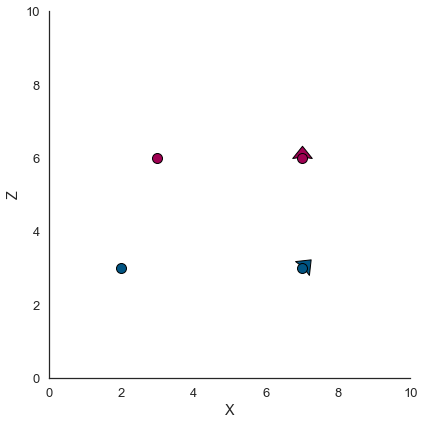

In [33]:
gp._plot.plot_data(geo_model)

In [34]:
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range            14.282857
$C_o$             4.857143
drift equations     [3, 3]


In [35]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

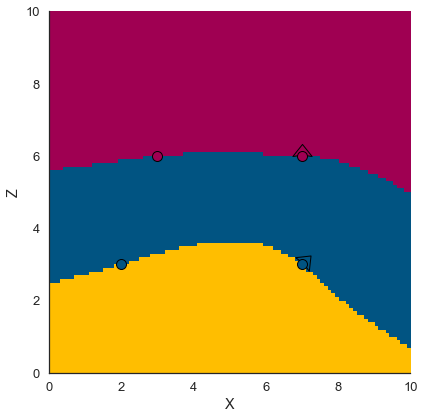

In [36]:
gp._plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

This model doesn't change, when we switch the formation of the orientations. Right now, the orientation point at Z=6 belongs to *unit_2* and the orientation point at Z=3 to *unit_1*. Let's switch those:

In [37]:
geo_model = gp.create_model('2layers_2series')

gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = '../data/02_2Layer_simple_model_interfaces.csv',
            path_o = '../data/02_2Layer_simple_model_2orientation2.csv');
geo_model.orientations

Active grids: ['regular']


,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,7,1,6,1.000000e-12,1.000000e-12,1.000000,0.01,unit_1
1,7,1,3,7.071068e-01,1.000043e-12,0.707107,0.01,unit_2


In [38]:
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range            14.282857
$C_o$             4.857143
drift equations     [3, 3]


In [39]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

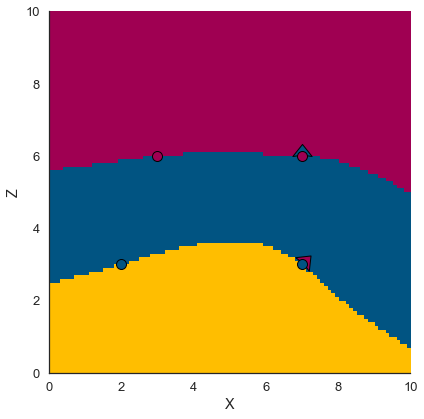

In [40]:
gp._plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

This changes however, if we assign the units to different series. Looking at the orientation data in the example, this is reasonable, as units in one series share the interpolation parameters. So, comprising units in a series is logical if they have a comparable spatial trend / geometry.

In [46]:
gp.map_series_to_surfaces(geo_model,
                         {"Series_2": 'unit_2',
                         "Series_1": 'unit_1'})

,surface,series,order_surfaces,color,id
1,unit_2,Series_2,1,#9f0052,1
0,unit_1,Series_1,1,#015482,2
2,basement,Basement,1,#ffbe00,3


In [47]:
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range            14.282857
$C_o$             4.857143
drift equations  [3, 3, 3]


In [48]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

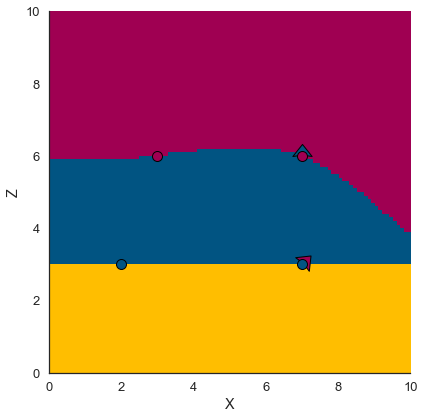

In [49]:
gp._plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

# Position of Orientation Data
*Orientation* data defines the underlying gradient field (its direction) and its location is important for the resulting model. In the following, we change the depth of *orientation* data points in the model:

In [50]:
geo_model_shallow = gp.create_model('shallow_orientation')

In [51]:
gp.init_data(geo_model_shallow, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = '../data/03_2Layer_simple_model_interfaces.csv',
            path_o = '../data/03_2Layer_simple_model_2orientation_shallow.csv');

Active grids: ['regular']


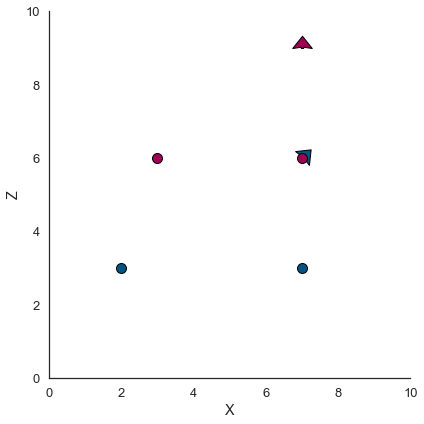

In [52]:
gp._plot.plot_data(geo_model_shallow)

In [53]:
geo_model_deep = gp.create_model('deep_orientation')

In [54]:
gp.init_data(geo_model_deep, [0, 10., 0, 2., 0, 10.], [100, 3, 100],
            path_i = '../data/03_2Layer_simple_model_interfaces.csv',
             path_o = '../data/03_2Layer_simple_model_2orientation_deep.csv', default_values=True);

Active grids: ['regular']


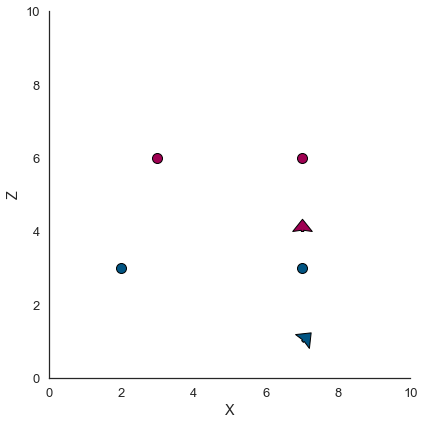

In [55]:
gp._plot.plot_data(geo_model_deep)

In [56]:
# Create the theano model
gp.set_interpolator(geo_model_shallow,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range            14.282857
$C_o$             4.857143
drift equations     [3, 3]


In [57]:
# Compute the model
sol = gp.compute_model(geo_model_shallow, compute_mesh=False)

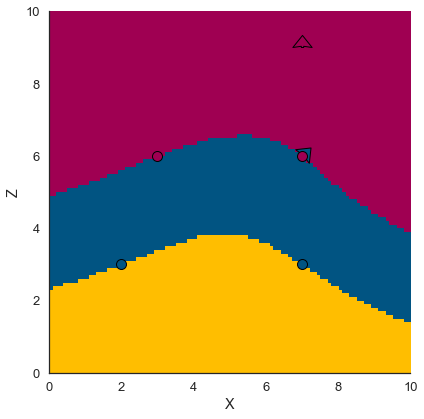

In [58]:
gp._plot.plot_section(geo_model_shallow, cell_number=2, direction='y', show_data=True)

In [59]:
# Create the theano model
gp.set_interpolator(geo_model_deep,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range            14.282857
$C_o$             4.857143
drift equations     [3, 3]


In [60]:
# Compute the model
sol = gp.compute_model(geo_model_deep, compute_mesh=False)

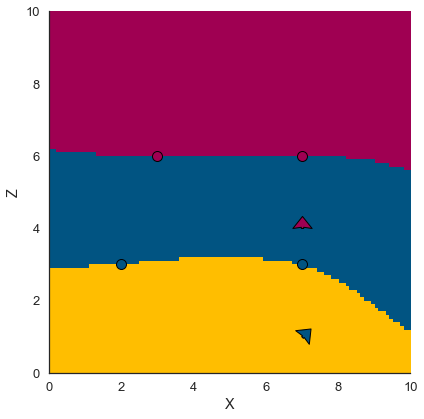

In [61]:
gp._plot.plot_section(geo_model_deep, cell_number=2, direction='y', show_data=True)

# Fault relations 
Let's introduce a common feature of geological models: faults. Faults are discontinuities, displacing rock units. In GemPy, Faults are modeled similarly to geologcial units, but distort the potential field of geological units. The result is the fault displacement.

In [62]:
geo_model = gp.create_model('2layers_2faults')

gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = '../data/04_2Layers_2Faults_interfaces.csv',
            path_o = '../data/04_2Layers_2Faults_orientations.csv');

Active grids: ['regular']


In [63]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,unit_1,Default series,1,#015482,1
1,unit_2,Default series,2,#9f0052,2
2,fault1,Default series,3,#ffbe00,3
3,fault2,Default series,4,#728f02,4
4,basement,Basement,1,#443988,5


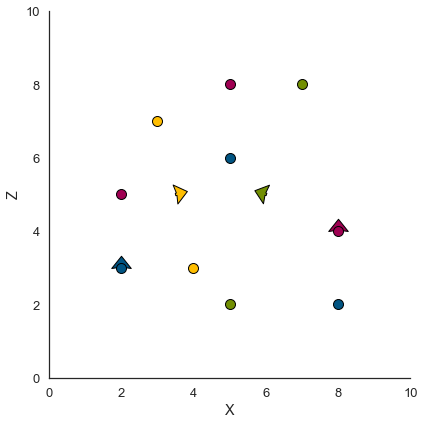

In [64]:
gp._plot.plot_data(geo_model)

In [65]:
gp.map_series_to_surfaces(geo_model,
                         {"Fault2_series":'fault2',
                          "Fault1_series":'fault1',
                          "Strati_series":('unit_2', 'unit_1')})

,surface,series,order_surfaces,color,id
3,fault2,Fault2_series,1,#728f02,1
2,fault1,Fault1_series,1,#ffbe00,2
0,unit_1,Strati_series,1,#015482,3
1,unit_2,Strati_series,2,#9f0052,4
4,basement,Basement,1,#443988,5


In [66]:
geo_model.set_is_fault(['Fault1_series', 'Fault2_series'], change_color=True)
#geo_model.set_is_finite_fault(series_fault=['Fault2_series'], toggle=True)

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault2_series,1,Fault,True,True,False
Fault1_series,2,Fault,True,True,False
Strati_series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [67]:
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!
Kriging values: 
                        values
range               14.282857
$C_o$                4.857143
drift equations  [3, 3, 3, 3]


In [68]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

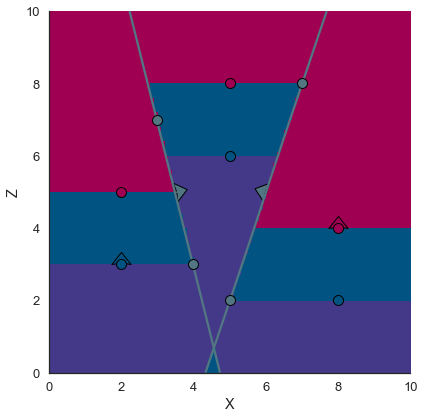

In [69]:
gp._plot.plot_section(geo_model, cell_number=2, direction='y')

We see that faults cross cut at the bottom without displacement. This is not realistic and also causes an error in the model (unit one is modeled between the faults. We can, however, set fault relations:

In [70]:
# table of fault relations
geo_model.faults.faults_relations_df

,Fault2_series,Fault1_series,Strati_series,Basement
Fault2_series,False,False,True,True
Fault1_series,False,False,True,True
Strati_series,False,False,False,False
Basement,False,False,False,False


In [73]:
fr = np.array([[False, True, True, True],
               [False, False, True, True],
               [False, False, False, False],
               [False, False, False, False]])

In [76]:
geo_model._faults.set_fault_relation(fr)

,Fault2_series,Fault1_series,Strati_series,Basement
Fault2_series,False,True,True,True
Fault1_series,False,False,True,True
Strati_series,False,False,False,False
Basement,False,False,False,False


In [77]:
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!
Kriging values: 
                        values
range               14.282857
$C_o$                4.857143
drift equations  [3, 3, 3, 3]


In [78]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

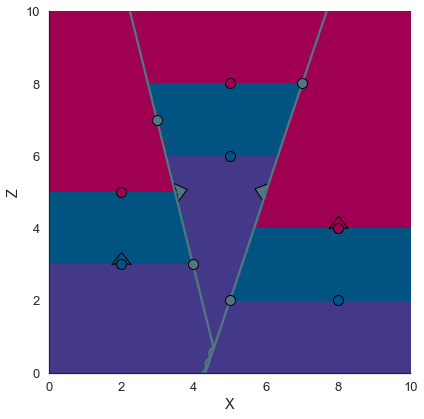

In [79]:
gp._plot.plot_section(geo_model, cell_number=1, direction='y', show_data=True)

## Onlap test

In [80]:
geo_model = gp.create_model('Test_model')

In [81]:
gp.init_data(geo_model, [0, 10., 0, 2., 0, 5.], [100, 3, 100],
            path_o = '../data/05_toy_fold_unconformity_orientations.csv',
             path_i = '../data/05_toy_fold_unconformity_interfaces.csv', default_values=True);

Active grids: ['regular']


In [82]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Basefold,Default series,1,#015482,1
1,Topfold,Default series,2,#9f0052,2
2,Inclined,Default series,3,#ffbe00,3
3,Flat,Default series,4,#728f02,4
4,basement,Basement,1,#443988,5


In [83]:
gp.map_series_to_surfaces(geo_model,
                         {"Flat_Series":'Flat',
                          "Inclined_Series":'Inclined',
                          "Fold_Series": ('Basefold', 'Topfold')})

,surface,series,order_surfaces,color,id
3,Flat,Flat_Series,1,#728f02,1
2,Inclined,Inclined_Series,1,#ffbe00,2
0,Basefold,Fold_Series,1,#015482,3
1,Topfold,Fold_Series,2,#9f0052,4
4,basement,Basement,1,#443988,5


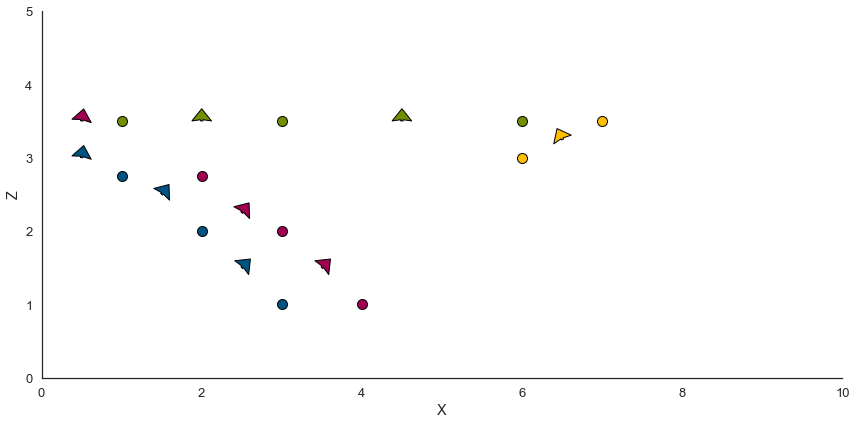

In [84]:
gp._plot.plot_data(geo_model, direction='y')

In [85]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
Flat_Series,1,Erosion,True,False,False
Inclined_Series,2,Erosion,True,False,False
Fold_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [86]:
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range               11.357817
$C_o$                3.071429
drift equations  [3, 3, 3, 3]


In [87]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

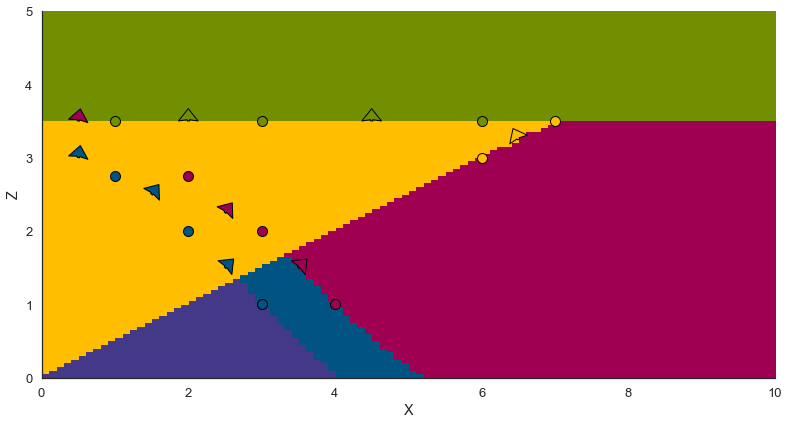

In [88]:
gp._plot.plot_section(geo_model, cell_number=2, direction='y')

## Inclined as ONLAP

In [90]:
# so let's set the Pregraben_Series to Onlap
geo_model._series.set_bottom_relation('Inclined_Series', bottom_relation='Onlap')

,order_series,BottomRelation,isActive,isFault,isFinite
Flat_Series,1,Erosion,True,False,False
Inclined_Series,2,Onlap,True,False,False
Fold_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [92]:
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range               11.357817
$C_o$                3.071429
drift equations  [3, 3, 3, 3]


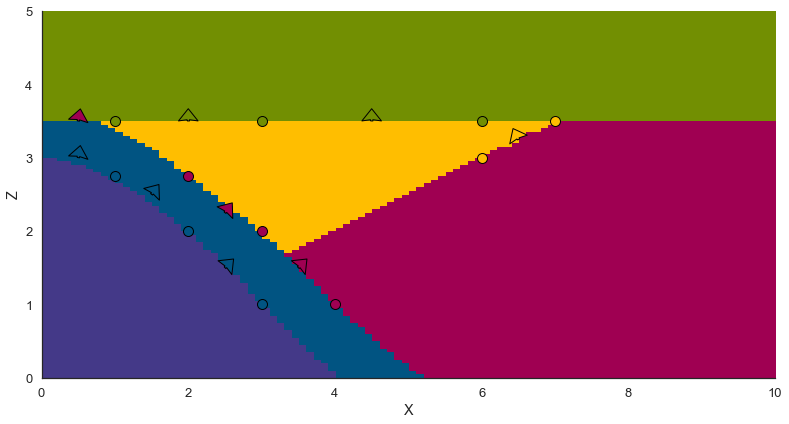

In [93]:
gp._plot.plot_section(geo_model, cell_number=2, direction='y')

## Inclined and Flat as ONLAP

In [98]:
# so let's set the Pregraben_Series to Onlap
geo_model._series.set_bottom_relation(['Flat_Series','Inclined_Series'], bottom_relation='Onlap')

,order_series,BottomRelation,isActive,isFault,isFinite
Flat_Series,1,Onlap,True,False,False
Inclined_Series,2,Onlap,True,False,False
Fold_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [99]:
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range               11.357817
$C_o$                3.071429
drift equations  [3, 3, 3, 3]


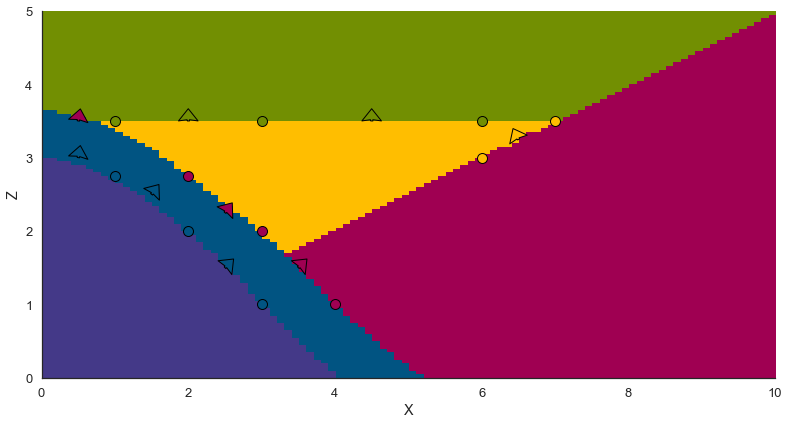

In [100]:
gp._plot.plot_section(geo_model, cell_number=2, direction='y')

In [102]:
gp.plot_3d(geo_model)

In [103]:
print("That's all folks!")

That's all folks!
